<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Получите и загрузите данные.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.**

In [ ]:
# Проверим, какие признаки можем отнести к категориальным
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Можем выделить несколько категориальных признаков: "Survived", "Pclass", "Sex", "SibSp", "Perch" и "Embarked". Удалим их все, кроме целевого признака "Survived".

In [ ]:
# Проверяем, в каких колонках есть пропуски данных
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Проверим, какой процент данных потеряем простым удалениемпустых значений
# Общее количество строк до удаления
total_rows_before = data.shape[0]

# DataFrame после удаления строк с пропущенными значениями
df_dropped = data.dropna()

# Общее количество строк после удаления
total_rows_after = df_dropped.shape[0]

# Расчет доли потерянных данных (строк)
lost_data_percentage = ((total_rows_before - total_rows_after) / total_rows_before) * 100

print(f"Процент потерянных данных (строк) при удалении: {lost_data_percentage:.2f}%")

Процент потерянных данных (строк) при удалении: 79.46%


Видим, что простое удаление строк с пропусками данных уменьшит наш исходный датасет практически на 80%, что кардинально повлияет на нашу модель

In [ ]:
# Удаляем категориальные переменные и пустые значения
data = data.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axis=1)
data = data.dropna()
data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123
6,7,0,"McCarthy, Mr. Timothy J",54.0,17463,51.8625,E46
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,PP 9549,16.7000,G6
11,12,1,"Bonnell, Miss. Elizabeth",58.0,113783,26.5500,C103


In [ ]:
# Удалим столбцы, которые не пригодятся дла анализа
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data.head()

,PassengerId,Survived,Age,Fare
1,2,1,38.0,71.2833
3,4,1,35.0,53.1000
6,7,0,54.0,51.8625
10,11,1,4.0,16.7000
11,12,1,58.0,26.5500


In [ ]:
# Удаляем целевой столбец из таблицы и записываем в новую таблицу
x = data.drop(['Survived'], axis=1)

In [ ]:
# Зададим вектор целевой переменной
y = data['Survived']

In [ ]:
# Обучим модель и посчитаем метрику качества
model = LogisticRegression()

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # кол-во итераций для обучения
    )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(len(X_train) + len(X_test) == len(X))

model.fit(x_train, y_train)
predictions = model.predict(x_test)

model.predict(x_test)  # получаем массив

train_score_lr = model.score(x_train, y_train)
test_score_lr = model.score(x_test, y_test)
print(f"score_train для логистической регрессии: {train_score_lr:.4f} ")
print(f"score_test для логистической регрессии: {test_score_lr:.4f} ")

score_train для логистической регрессии: 0.7095 
score_test для логистической регрессии: 0.6486 


Не смотря на большую утрату исходных данных, метрика качества на тестовой выборке получилась равной почти 0.65. Попытаемся улучшить это значение

In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Method', 'score_train', 'score_test'])

In [ ]:
results.loc[len(results)] = ['Модель с удалением пропусков', train_score_lr, test_score_lr]

**3. Снова загрузите полные данные.**

In [ ]:
new_data = pd.read_csv('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/Titanic.csv')
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

В анализ не будем брать следующие признаки:

"PassengerId" - не несёт полезной информации, т.к. является идентификатором пассажира.

"Name" - в данном примере не будем применять имя, хотя оно может быть полезным (например политические лидеры, звёзды и т.п.)

"Ticket" - не несёт полезной информации. В данном случае более информативно будет значение класса.

"Cabin" - аналогично, более информативно будет значение класса.


In [ ]:
new_data = new_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Проверим, в каких столбцах имеются пропуски
new_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# Статистика по всем столбцам
new_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можем заметить, что в столбце "Fare" минимальное значение равно нулю. Проверим такие данные

In [ ]:
new_data[new_data['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,NaN,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,NaN,0,0,0.0,S
466,0,2,male,NaN,0,0,0.0,S
481,0,2,male,NaN,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,NaN,0,0,0.0,S


Можем предположить, что эти билеты были выданы в качестве приза, поэтому их цена равна нулю, но в рамках данной задачи примем такие данные за выбросы и удалим их из датасета.

In [ ]:
new_data = new_data[new_data['Fare'] != 0]

In [ ]:
new_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,707.000000,876.000000,876.000000,876.000000
mean,0.389269,2.315068,29.645219,0.531963,0.388128,32.755650
std,0.487863,0.835663,14.558872,1.110009,0.811374,49.936826
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Видим, что выбросов больше нет в таблице

Проведём анализ и посмотрим, как распределены данные для целевой переменной и для переменных с пропусками в данных

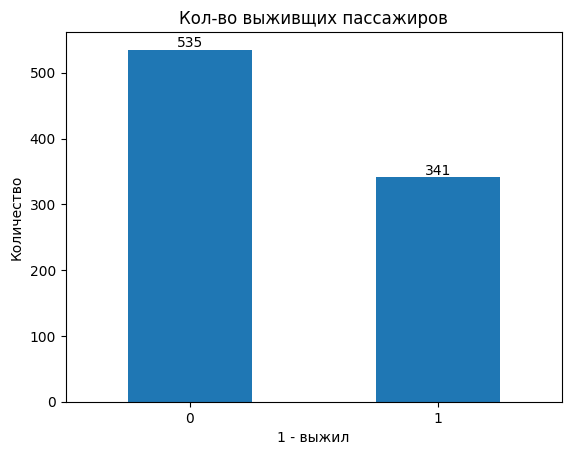

In [ ]:
# Целевое значение
survival_counts = new_data['Survived'].value_counts()
survival_counts.plot(kind='bar')
plt.title('Кол-во выживщих пассажиров')
plt.xlabel('1 - выжил')
plt.ylabel('Количество')
plt.xticks(rotation=0)  # Поворот надписей на оси X для лучшего отображения
for index, value in enumerate(survival_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Видим, что большая часть пассажиров не выжила

Для получения корректной информации по возрасту, необходимо сперва сгруппировать данные. По статистике наименьший возратс можемпринять равным 0, наибольший - 80. Разделим группы с шагом в 10 лет.

In [ ]:
# Функция для группировки по возрасту
def categorize(value):
    if value <= 10:
        return '[0-10]'
    elif value > 10 and value <=20:
        return '(10-20]'
    elif value > 20 and value <=30:
        return '(20-30]'
    elif value > 30 and value <=40:
        return '(30-40]'
    elif value > 40 and value <=50:
        return '(40-50]'
    elif value > 50 and value <=60:
        return '(50-60]'
    elif value > 60 and value <=70:
        return '(60-70]'
    elif value > 70 and value <=80:
        return '(70-80]'
    else:
        return value

In [ ]:
# Добавим новый столбец в таблицу с данными
new_data['Grouped_Age'] = new_data['Age'].apply(categorize)
new_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Grouped_Age
0,0,3,male,22.0,1,0,7.2500,S,(20-30]
1,1,1,female,38.0,1,0,71.2833,C,(30-40]
2,1,3,female,26.0,0,0,7.9250,S,(20-30]
3,1,1,female,35.0,1,0,53.1000,S,(30-40]
4,0,3,male,35.0,0,0,8.0500,S,(30-40]
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,(50-60]
7,0,3,male,2.0,3,1,21.0750,S,[0-10]
8,1,3,female,27.0,0,2,11.1333,S,(20-30]
9,1,2,female,14.0,1,0,30.0708,C,(10-20]


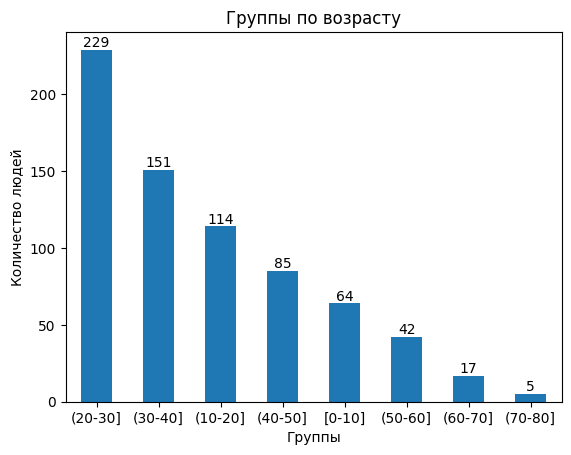

In [ ]:
# Возрастные группы
age_counts = new_data['Grouped_Age'].value_counts()
age_counts.plot(kind='bar')
plt.title('Группы по возрасту')
plt.xlabel('Группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)  # Поворот надписей на оси X для лучшего отображения
for index, value in enumerate(age_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Видим, что возраст большей части пассажиров находится в диапазоне (20-40] лет. При этом общее количество на данной диаграмме не учитывает пропущенных значений.

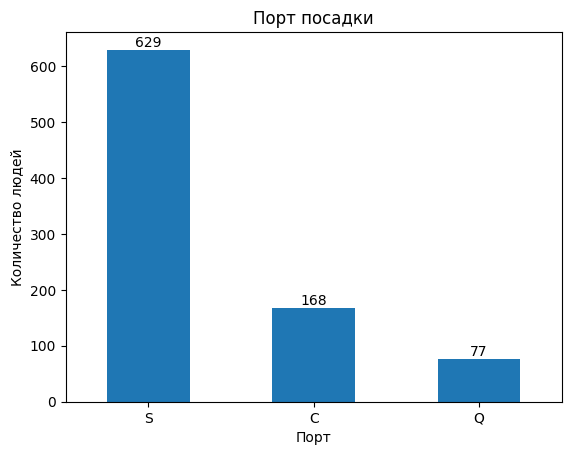

In [ ]:
# Порт посадки
embarked_counts = new_data['Embarked'].value_counts()
embarked_counts.plot(kind='bar')
plt.title('Порт посадки')
plt.xlabel('Порт')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)  # Поворот надписей на оси X для лучшего отображения
for index, value in enumerate(embarked_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Видим, что большинство пассажиров произвело посадку в порту S (Саутгемптон)

По результатам проведённого анализа можно заметить, что данные распределены не равномерно, что может вызывать искажения в предсказаниях

**5. Проверьте данные на наличие пропущенных значений.**

**a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.**

In [ ]:
total_rows_before = new_data.shape[0]

df_dropped = new_data.dropna()

total_rows_after = df_dropped.shape[0]

lost_data_percentage = ((total_rows_before - total_rows_after) / total_rows_before) * 100

print(f"Процент потерянных данных (строк) при удалении: {lost_data_percentage:.2f}%")

Процент потерянных данных (строк) при удалении: 19.52%


Видим, что простое удаление уменьшает размер датасета на 19.52%, что существенно скажется на работе модели

**b) Заполните пропуски**

Произведём замену пустых знаений в столбце "Embarked" на моду по столбцу. Используем данный метод, т.к. пропусков немного и при имеющемся распределении по данному столбцу эта замена не будет нарушать правила датафрейма.

In [ ]:
# Вычисление моды для выбранной колонки
mode_value = new_data['Embarked'].mode()[0]

# Замена пустых значений на моду для выбранной колонки
new_data['Embarked'].fillna(value=mode_value, inplace=True)

In [ ]:
# Проверяем отсутствие пропусков по столбцу "Embarked"
new_data.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            169
SibSp            0
Parch            0
Fare             0
Embarked         0
Grouped_Age    169
dtype: int64

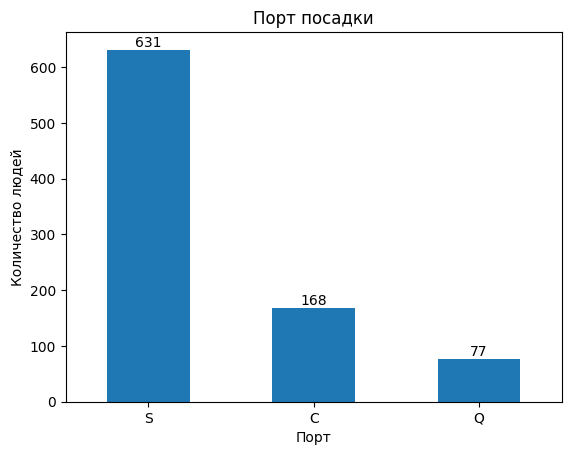

In [ ]:
# Порт посадки
embarked_counts = new_data['Embarked'].value_counts()
embarked_counts.plot(kind='bar')
plt.title('Порт посадки')
plt.xlabel('Порт')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)  # Поворот надписей на оси X для лучшего отображения
for index, value in enumerate(embarked_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Как видно, пропуски заполнились значением "S"

Произведём замену пустых знаений в столбце "Age" на случайное значение в диапазоне от 41 до 80, т.к. в датасете есть явное смещение и таким образом мы постараемся его уменьшить.

In [ ]:
new_data['Age'] = new_data['Age'].apply(lambda x: np.random.uniform(41, 80) if pd.isnull(x) else x)

In [ ]:
new_data.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Grouped_Age    169
dtype: int64

Заметим, что пустые значения по столбцу "Age" отсутствуют

In [ ]:
# Добавим новый столбец в таблицу с данными для построения новой диаграммы
new_data['Grouped_Age_New'] = new_data['Age'].apply(categorize)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Grouped_Age,Grouped_Age_New
0,0,3,male,22.0,1,0,7.2500,S,(20-30],(20-30]
1,1,1,female,38.0,1,0,71.2833,C,(30-40],(30-40]
2,1,3,female,26.0,0,0,7.9250,S,(20-30],(20-30]
3,1,1,female,35.0,1,0,53.1000,S,(30-40],(30-40]
4,0,3,male,35.0,0,0,8.0500,S,(30-40],(30-40]


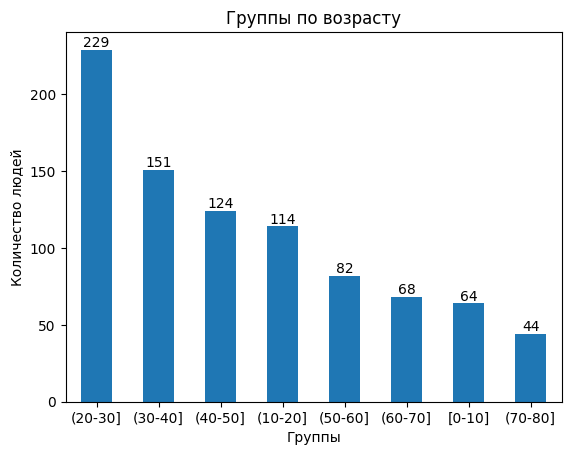

In [ ]:
# Возрастные группы
age_counts = new_data['Grouped_Age_New'].value_counts()
age_counts.plot(kind='bar')
plt.title('Группы по возрасту')
plt.xlabel('Группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)  # Поворот надписей на оси X для лучшего отображения
for index, value in enumerate(age_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Как видно из диаграммы, данные распределены с меньшим разбросом.

**6. Категориальные переменные переведите в цифровые значения.**

Ещё раз посмотрим на текущую таблицу с данными

In [ ]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Grouped_Age,Grouped_Age_New
0,0,3,male,22.0,1,0,7.2500,S,(20-30],(20-30]
1,1,1,female,38.0,1,0,71.2833,C,(30-40],(30-40]
2,1,3,female,26.0,0,0,7.9250,S,(20-30],(20-30]
3,1,1,female,35.0,1,0,53.1000,S,(30-40],(30-40]
4,0,3,male,35.0,0,0,8.0500,S,(30-40],(30-40]


In [ ]:
new_data.nunique()

Survived             2
Pclass               3
Sex                  2
Age                257
SibSp                7
Parch                7
Fare               247
Embarked             3
Grouped_Age          8
Grouped_Age_New      8
dtype: int64

Необходимо перевести значения по столбцам "Sex" и "Embarked" в цифровые значения. Для столбцов "Sex" и "Embarked" применим метод one-hot encoding.

Также в анализ не будем брать вспомогательные столбцы "Grouped_Age" и "Grouped_Age_New".

In [ ]:
selectedColumns = new_data.iloc[:, :-2]
selectedColumns.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
x = pd.get_dummies(selectedColumns, columns=['Embarked', 'Sex'], dtype=int)
x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    876 non-null    int64  
 1   Pclass      876 non-null    int64  
 2   Age         876 non-null    float64
 3   SibSp       876 non-null    int64  
 4   Parch       876 non-null    int64  
 5   Fare        876 non-null    float64
 6   Embarked_C  876 non-null    int64  
 7   Embarked_Q  876 non-null    int64  
 8   Embarked_S  876 non-null    int64  
 9   Sex_female  876 non-null    int64  
 10  Sex_male    876 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 82.1 KB


Убедились, что в датасете больше нет текстовых значений.

In [ ]:
y = x['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Удалим целевое значение из таблицы
del x['Survived']
x.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


**10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**

In [ ]:
model_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
    )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_1.fit(x_train, y_train)
predictions = model_1.predict(x_test)

model_1.predict(x_test)

train_score_lr_1 = model_1.score(x_train, y_train)
test_score_lr_1 = model_1.score(x_test, y_test)
print(f"score_train для логистической регрессии: {train_score_lr_1:.4f} ")
print(f"score_test для логистической регрессии: {test_score_lr_1:.4f} ")

score_train для логистической регрессии: 0.8043 
score_test для логистической регрессии: 0.7784 


In [ ]:
results.loc[len(results)] = ['Модель с заменой пропусков', train_score_lr_1, test_score_lr_1]

Посмотрим на итоговые значения метрики качества для двух моделей

In [ ]:
print(results)

                         Method  score_train  score_test
0  Модель с удалением пропусков     0.709459    0.648649
1    Модель с заменой пропусков     0.804286    0.778409


Модель с заменой пропусков получила значительный рост метрики качества как на обучающей, так и на тестовой выборках.

Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.

**11. Сформулируйте выводы по проделанной работе.**

**a) Кратко опишите какие преобразования были сделаны и почему.**

О модели, для которой производилась замена пропущенных значений:

1. Удалил некоторые столбцы. т.к. для данной задачи посчитал их не несущими
полезной информации.

2. Сделал заполнение пропущенных значений для показателей, которые взял в анализ.

3. Удалил выбросы по столбцу "Fare", т.к. они могут смещать предсказания модели.

4. Выполнил преобразование категориальных признаков в числовые при помощи one-hot encoding для дальнейшей работы модели.

**b) Сравните метрики двух моделей**

По результатам произведённого анализа и обучения двух моделей, можем заметить, что замена пропусков значительно улучшила качество модели, как на обучающей выборке, так и на тестовой. На рост качества также повлияло увеличение количества признаков, которые взяли для обучения модели.

**c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.**

Очевидно, что для качественной работы модели необходимы качественные данные. Считаю, что целесообразно уделять должное внимание подготовке данных, как мы заметили в результате сравнения работы двух моделей.

**P.S.**

**7-9 выполнены внутри других блоков**